In [1]:
import tensorflow as tf 
from tensorflow import keras 
import numpy as np 
import matplotlib.pyplot as plt 
import cv2
from os import path 
import time
print("started")

2023-04-29 20:42:29.140519: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-29 20:42:32.168035: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/home/abk/miniconda3/envs/tf/lib/
2023-04-29 20:42:32.168163: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/home/abk/miniconda3/envs/tf/lib/
2023-04-29 20:42:32.168178: W tensorflow/compiler/tf2tensorr

started


In [2]:
# datasets_folder = "E:\\dataset\\main_project\\datasets"
datasets_folder = "/media/abk/DATA 2/dataset/main_project_updated/datasets"
# elephant_dataset = path.join(datasets_folder,"elephant")
# wild_board_dataset = path.join(datasets_folder,"wild_boar")
# bird_dataset = path.join(datasets_folder,"bird")



batch_size = 64
img_height = 180
img_width = 180

In [3]:
color_mode = "grayscale"
train_ds = keras.utils.image_dataset_from_directory(
    datasets_folder,
    validation_split=0.2,
    subset="training",
    seed=123,
    color_mode=color_mode,
    image_size=(img_height,img_width),
    batch_size=batch_size
)

Found 6978 files belonging to 5 classes.
Using 5583 files for training.


2023-04-29 20:42:35.964916: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-04-29 20:42:35.986081: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-04-29 20:42:35.986467: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-04-29 20:42:35.987086: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorF

In [4]:

val_ds = keras.utils.image_dataset_from_directory(
    datasets_folder,
    validation_split=0.2,
    subset="validation",
    seed=123,
    color_mode=color_mode,
    image_size=(img_height,img_width),
    batch_size=batch_size
)

Found 6978 files belonging to 5 classes.
Using 1395 files for validation.


['bird', 'elephant', 'person', 'undetected', 'wild_boar']


2023-04-29 20:42:38.067463: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-04-29 20:42:39.233486: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


finished


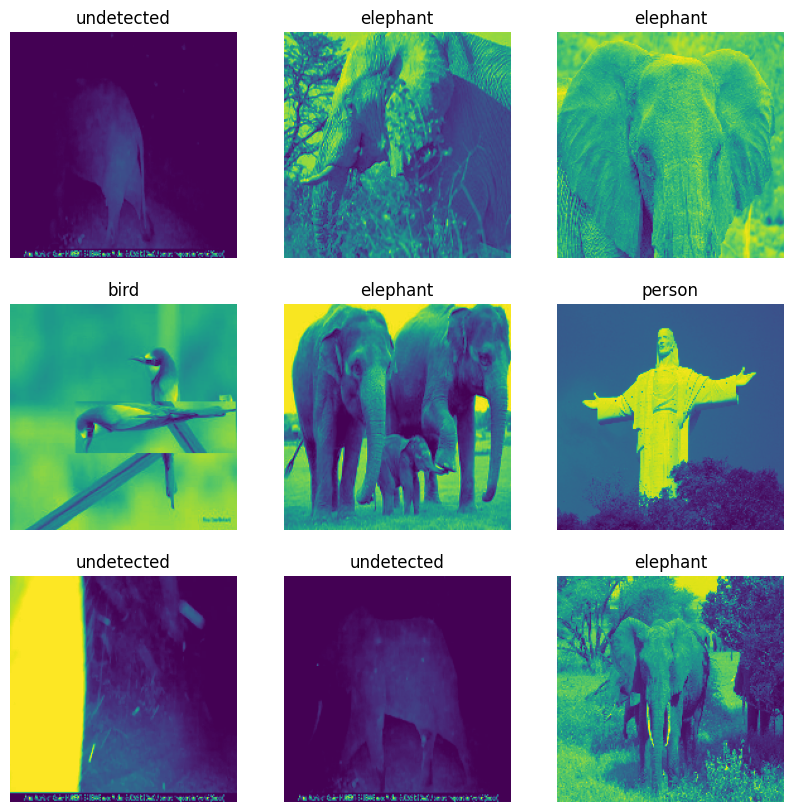

In [5]:
class_names = train_ds.class_names 
print(class_names)
class_len = len(class_names)

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")
    
print("finished")






In [6]:
AUTOTUNE = tf.data.AUTOTUNE 

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)
print("finished")



finished


In [7]:
# data_augmentation = tf.keras.Sequential(
#   [
#     tf.keras.layers.RandomFlip("horizontal",
#                       input_shape=(img_height,
#                                   img_width,
#                                   1)),
#     tf.keras.layers.RandomRotation(0.4),
#     tf.keras.layers.RandomZoom(0.1),
#   ]
# )

In [8]:
model = keras.models.Sequential([
    # data_augmentation,
    keras.layers.Rescaling(1./255, input_shape=(img_height,img_width,1)),
    keras.layers.Conv2D(16,3, activation="relu"),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(32,3, activation="relu"),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(64,3, activation="relu"),
    keras.layers.MaxPooling2D(),
    keras.layers.Flatten(),
    keras.layers.Dense(128,activation='relu'),
    keras.layers.Dense(class_len , activation='softmax')

])

model.compile(optimizer="adam",loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
            metrics=keras.metrics.SparseCategoricalAccuracy())

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 1)       0         
                                                                 
 conv2d (Conv2D)             (None, 178, 178, 16)      160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 89, 89, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 87, 87, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 43, 43, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 41, 41, 64)        1

In [14]:
epochs =  35
history = model.fit(train_ds,validation_data=val_ds,epochs=epochs , verbose=1)

Epoch 1/35
88/88 [==============================] - 6s 66ms/step - loss: 0.0025 - sparse_categorical_accuracy: 0.9998 - val_loss: 1.2141 - val_sparse_categorical_accuracy: 0.7849
Epoch 2/35
88/88 [==============================] - 6s 66ms/step - loss: 0.0032 - sparse_categorical_accuracy: 0.9996 - val_loss: 1.2003 - val_sparse_categorical_accuracy: 0.7957
Epoch 3/35
88/88 [==============================] - 6s 66ms/step - loss: 0.0035 - sparse_categorical_accuracy: 0.9996 - val_loss: 1.2295 - val_sparse_categorical_accuracy: 0.7928
Epoch 4/35
88/88 [==============================] - 6s 67ms/step - loss: 0.0011 - sparse_categorical_accuracy: 0.9998 - val_loss: 1.2972 - val_sparse_categorical_accuracy: 0.7821
Epoch 5/35
88/88 [==============================] - 6s 67ms/step - loss: 0.0033 - sparse_categorical_accuracy: 0.9996 - val_loss: 1.2440 - val_sparse_categorical_accuracy: 0.7950
Epoch 6/35
88/88 [==============================] - 6s 67ms/step - loss: 0.0019 - sparse_categorical_accu

In [15]:
# acc = history.history['val_accuracy']
acc = history.history['val_sparse_categorical_accuracy']
print(acc)
final_acc = acc[len(acc) - 1]
ts = time.time()

model.save(f"m-esp32(u-1,e-{epochs})-{round(final_acc,4)}-(h-det,ud)(added-bird-datas).h5")

[0.7849462628364563, 0.7956989407539368, 0.792831540107727, 0.7820788621902466, 0.7949820756912231, 0.7856630682945251, 0.7942652106285095, 0.7956989407539368, 0.7935484051704407, 0.7942652106285095, 0.7913978695869446, 0.7849462628364563, 0.7390680909156799, 0.7526881694793701, 0.7555555701255798, 0.783512532711029, 0.76917564868927, 0.7806451320648193, 0.7827957272529602, 0.7756272554397583, 0.783512532711029, 0.7784945964813232, 0.783512532711029, 0.7756272554397583, 0.783512532711029, 0.7827957272529602, 0.7827957272529602, 0.7849462628364563, 0.7784945964813232, 0.7799283266067505, 0.7842293977737427, 0.781361997127533, 0.7849462628364563, 0.783512532711029, 0.7878136038780212]


1/1 [==============================] - 0s 35ms/step
animal : bird | accuracy :  0.0
animal : elephant | accuracy :  0.0
animal : person | accuracy :  100.0
animal : undetected | accuracy :  0.0
animal : wild_boar | accuracy :  0.0


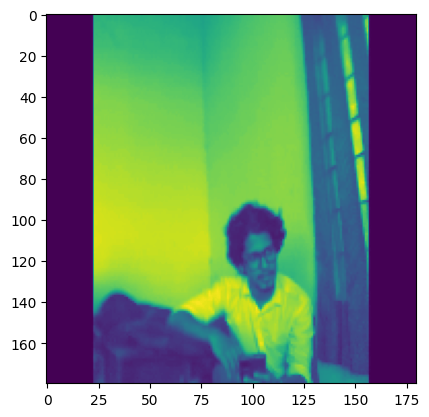

In [16]:
img = tf.keras.utils.load_img(
    "test/3.jpg",
    target_size = (img_height,img_width),
    color_mode = color_mode 
)


img_array = tf.keras.utils.img_to_array(img)

img_array = tf.expand_dims(img_array, 0) # Create a batch
predictions = model.predict(img_array)

# score = tf.nn.softmax(predictions[0])
score = predictions[0]

print(f"animal : {class_names[0]} | accuracy :  {round(np.array(score)[0] * 100,2)}")
print(f"animal : {class_names[1]} | accuracy :  {round(np.array(score)[1] * 100,2)}")
print(f"animal : {class_names[2]} | accuracy :  {round(np.array(score)[2] * 100,2)}")
if len(class_names) > 3 :
    print(f"animal : {class_names[3]} | accuracy :  {round(np.array(score)[3] * 100,2)}")
if len(class_names) > 4 :
    print(f"animal : {class_names[4]} | accuracy :  {round(np.array(score)[4] * 100,2)}")
plt.imshow(img)
